import pandas as pd
import numpy as np

In [19]:
#df_red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")
#df_white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")

If your internet connection is slow, you can directly read from the local files. Uncomment (remove #) before you execute.

In [2]:
df_red = pd.read_csv('winequality-red.csv', sep=";")
df_white = pd.read_csv('winequality-red.csv', sep=";")

In [21]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
df_red.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


2nd week's exercise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split


df_red = pd.read_csv(\
r'C:\Users\Tianhang\Documents\GitHub\my\winequality-red.csv', sep=";")


y = (df_red['quality'].values > 6)
X = df_red.iloc[:,0:-1]
Y = df_red['quality']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)



Find the important features for selection

In [2]:
        
       
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree.fit(X_train, y_train)
print(tree.feature_importances_)



[ 0.04611566  0.17271035  0.02512039  0.06071927  0.10103663  0.07281429
  0.06271506  0.09222337  0.05661107  0.08546561  0.2244683 ]


In [4]:
X1 =X.iloc[:,[1,10]]

X1_train, X1_test, y_train, y_test = \
    train_test_split(X1, y, test_size=0.3, random_state=0)
    
X1.head()

,volatile acidity,alcohol
0,0.70,9.4
1,0.88,9.8
2,0.76,9.8
3,0.28,9.8
4,0.70,9.4


In [5]:
X1_train, X1_test, y_train, y_test = \
    train_test_split(X1, y, test_size=0.3, random_state=0)

tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=4,
                              random_state=0)
tree.fit(X1_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

Visualize the tree

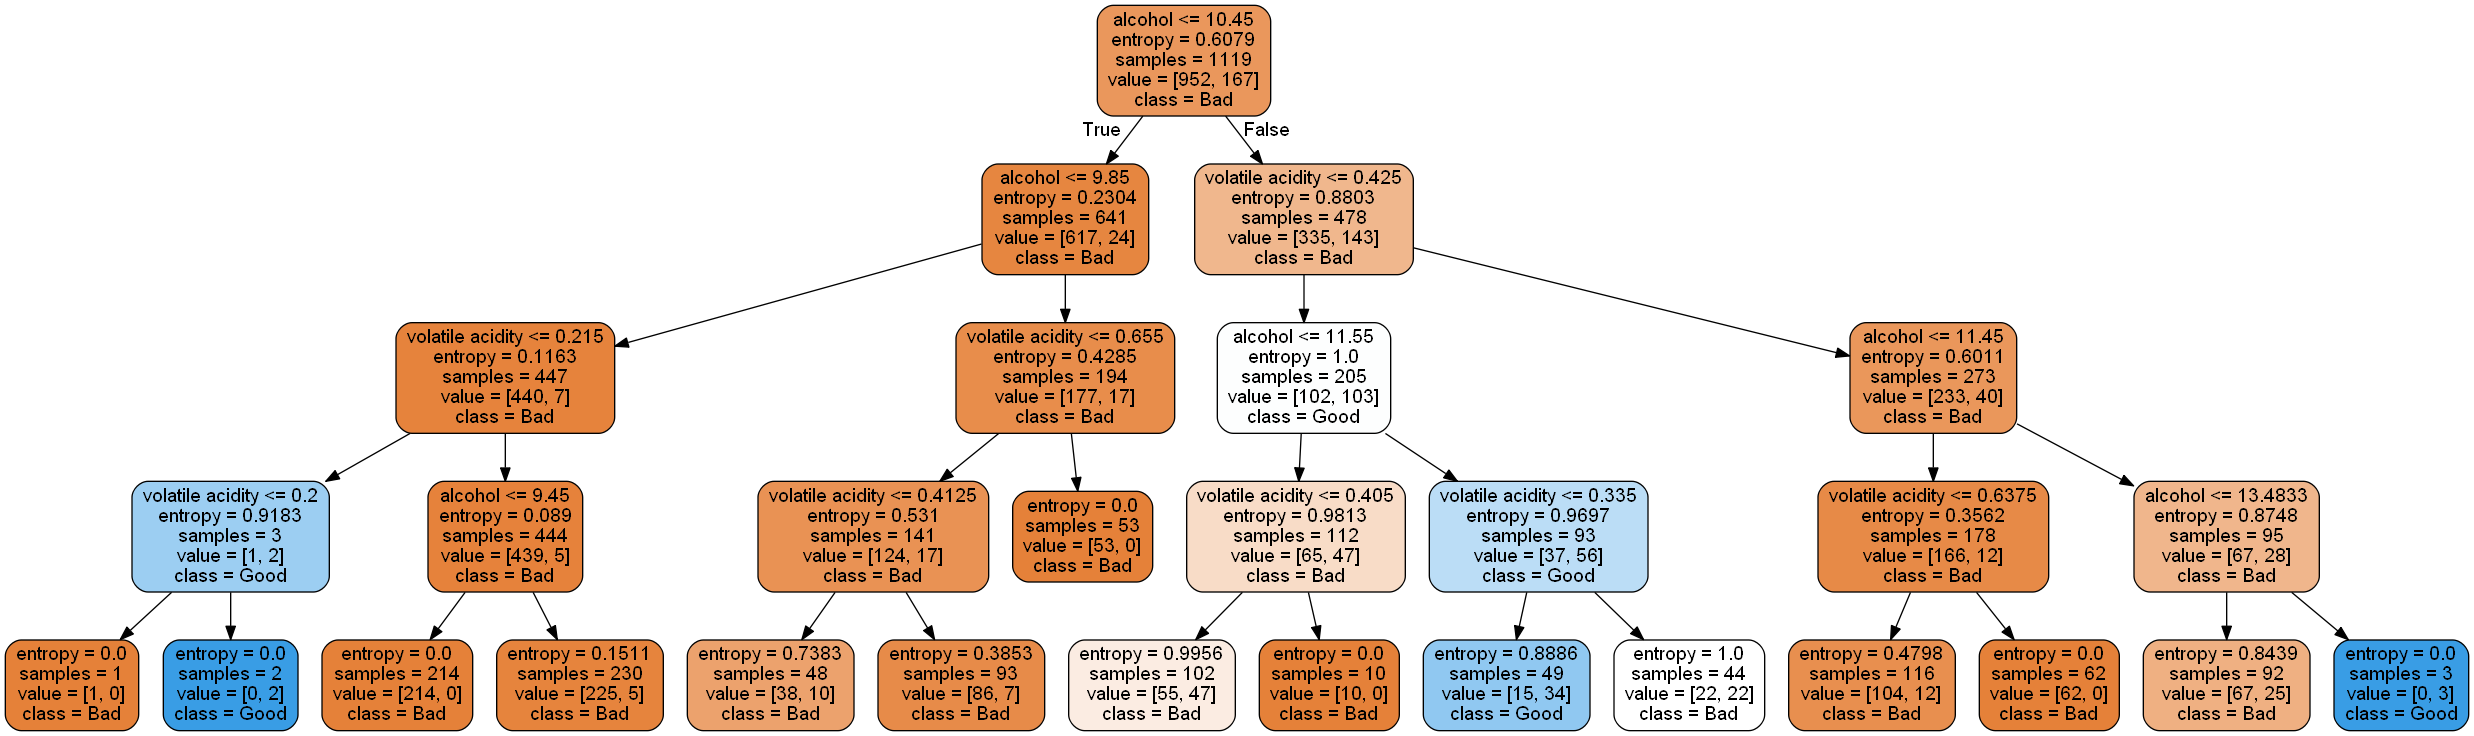

In [8]:
import pydotplus
dot_data = export_graphviz(
        tree, 
        feature_names=list(X1.columns),  
        class_names=['Bad', 'Good'],
        out_file=None,  
        filled=True,
        rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)  
from IPython.display import Image 
from IPython.display import display
display(Image(graph.create_png()))




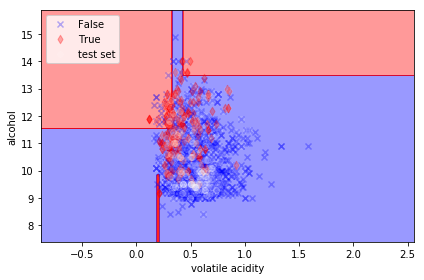

In [9]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('x', 'd', 'o')
    colors = ( 'b', 'r', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.3, c=cmap(idx),
                    marker=markers[idx], label=cl)
        
    plt.scatter(X1_test.iloc[:, 0],
        X1_test.iloc[:, 1],
        c='w',
        alpha=0.1,
        linewidths=1,
        marker='o',
        edgecolors='face',
        label='test set')

        


X_combined = np.vstack((X1_train, X1_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree)



plt.xlabel('volatile acidity')
plt.ylabel('alcohol')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/decision_tree_decision.png', dpi=300)
plt.show()

Try RandomForest method

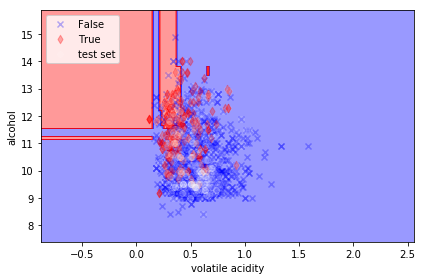

In [10]:
from sklearn.ensemble import RandomForestClassifier 
forest = RandomForestClassifier(criterion='entropy',
              max_depth=4,
              random_state=0,
              n_jobs=2)
forest.fit(X1_train, y_train)

X_combined = np.vstack((X1_train, X1_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=forest)



plt.xlabel('volatile acidity')
plt.ylabel('alcohol')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/decision_tree_decision.png', dpi=300)
plt.show()